# CLAHE - Contrast Limited Adapative Histogram

enchances specific region in an image

In [1]:
import cv2
import matplotlib.pyplot as plt

## CLAHE with grayscale image

In [2]:
image = cv2.imread("../images/test_img.jpg")

if image is None:
    print("Cant load the image")
else:
    print("Image loaded successfully")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Image loaded successfully


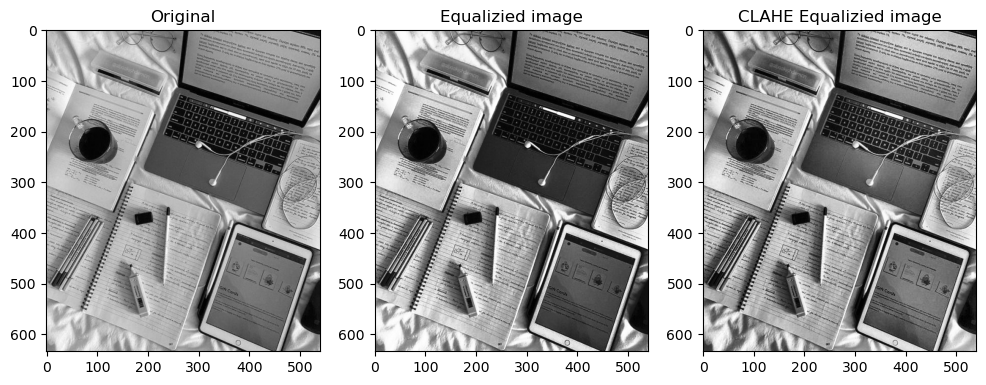

In [3]:
# Histrogram Equalization

equalized_img = cv2.equalizeHist(image_gray)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4)) # cliplimit -> this sets threshold for contrast limiting, 
# increasing value leads to over enhancement, else decrease it; title -> number of tiles in an image, 
# smaller tiles enhance local contrast more and introduce noise and larger tiles will give smoother results but loss in details.

clahe_equalized_img = clahe.apply(image_gray)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(image_gray, cmap="gray")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Equalizied image")

plt.subplot(1,3,3)
plt.imshow(clahe_equalized_img, cmap="gray")
plt.title("CLAHE Equalizied image")

plt.show()

In CLAHE image(right), the contrast is improved, but enhancement is more balanced compared to equalizied center(middle), fine details are highlighted without amplifying noise via clip limit. 

## CLAHE with color image

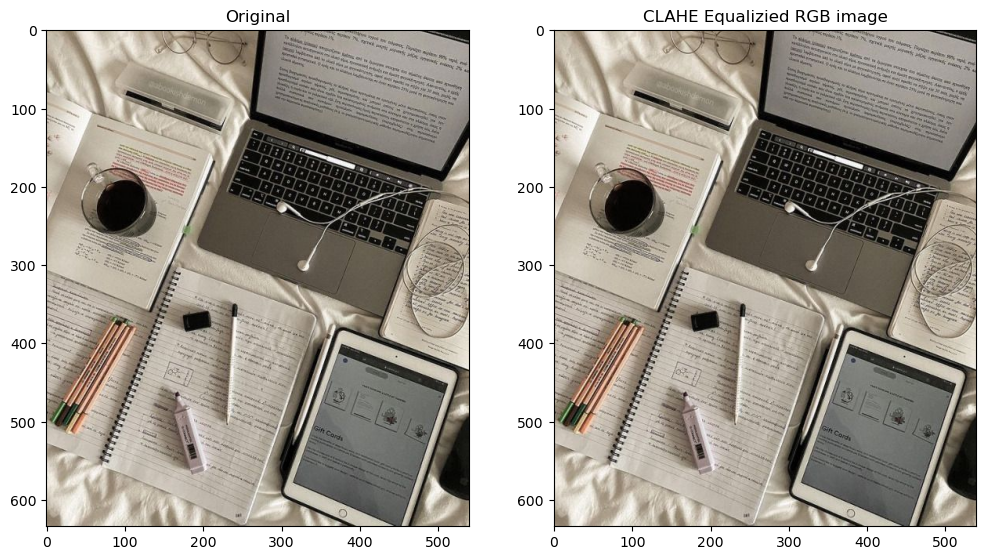

In [5]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# applying CLAHE only on 1st channel, because y deals with brightness of image. 

image_yuv[:,:,0] = clahe.apply(image_yuv[:,:,0])
image_yuv_bgr = cv2.cvtColor(image, cv2.COLOR_YUV2BGR)
image_bgr_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(image_bgr_rgb)
plt.title("CLAHE Equalizied RGB image")


plt.show()